# Homework - Data Analysis and Matplotlib Visualization

## My strategy:
For figure 1, I will reformat the date columns appropriately, extract the years, and then use the groupby function to obtain the total claim payment amount for each year. Finally I will use pandas' plot function using a bar graph to visualize the data.
For figure 2, I will filter the dataframe to year 2009, drop any observations without a provider NPI recorded, obtain the total amount of claim payment per patient, and then define a function that concatenates the provider columns and retrieves a unique number of physicians seen per patient. The costs of care is averaged with the number of physicians seen. Finally the matplotlib module is use to plot the data using a line graph to show the relationship.

### What is asked:
1. Analyze and display the total cost of outpatient care (using claim payment amount for each patient) for each year using pandas bar plot.
2. Analyze and display the total cost of outpatient care with the number of unique phyicians visited per patient for the year 2009 only using the matplotlib line graph.

### Input:
SynPUF data - Medicare claims synthetic data containing information about cost of care

### Output:
1. Figure 1 - A bar graph showing the total cost of outpatient care for each year.
2. Figure 2 - A line graph showing the relationship between the number of unique physicians seen and the total cost of outpatient care.

### Steps:
Figure 1:
1. Load and read the file using pandas
2. Drop observations with missing claims date
3. Reformat the claims date
4. Extract and group the data by year
5. Sum the claim payment amount for each year
6. Use pandas bar graph to plot the data

Figure 2:
1. Filter the dataframe to year 2009
2. Drop observations with no provider NPI recorded in all of the 3 provider columns
3. Obtain the number of unique physicians who visited by first creating a new dataframe to filter the data that includes patient ID, attending physician's NPI, operating physician's NPI, and other physician's NPI; then define a function that concatenates the 3 physican columns and obtains a unique count; the dataframe is grouped by patient ID; and finally we call the function
4. Obtain the total costs of care per patient by first creating a new dataframe to filter the data that includes patient ID and claims amount, then group the dataframe by patient ID, and finally use the sum function
5. Create a new dataframe to combine all the extracted data
6. Group the data by the number of unique physicians and obtain the average
7. Use matplotlib line graph to plot the data

### Importing the pandas, matplotlib, and numpy modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

## Figure 1

### Loading and reading the CSV file

In [2]:
df = pd.read_csv('/opt/class/medicare/outpatient.csv', low_memory=False)

In [3]:
df.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,542192281063886,1,20080904.0,20080904.0,2600RA,50.0,0.0,4.824842e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,542272281166593,1,20090602.0,20090602.0,3901GS,30.0,0.0,2.963420e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,542282281644416,1,20090623.0,20090623.0,3939PG,30.0,0.0,5.737808e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001FDD721E223DC,542642281250669,1,20091011.0,20091011.0,3902NU,30.0,0.0,1.233848e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00024B3D2352D2D0,542242281386963,1,20080712.0,20080712.0,5200TV,30.0,0.0,9.688809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing missing data

First we will drop any observations where the date is missing. Then data type is converted from a float to integer. This is so we will not run into formatting errors as we reformat the date.

In [4]:
df = df.dropna(axis=0, subset=[['CLM_FROM_DT', 'CLM_THRU_DT']])
df[['CLM_FROM_DT', 'CLM_THRU_DT']] = df[['CLM_FROM_DT', 'CLM_THRU_DT']].astype(np.int64)

In [5]:
df.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,542192281063886,1,20080904,20080904,2600RA,50.0,0.0,4.824842e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,542272281166593,1,20090602,20090602,3901GS,30.0,0.0,2.963420e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,542282281644416,1,20090623,20090623,3939PG,30.0,0.0,5.737808e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001FDD721E223DC,542642281250669,1,20091011,20091011,3902NU,30.0,0.0,1.233848e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00024B3D2352D2D0,542242281386963,1,20080712,20080712,5200TV,30.0,0.0,9.688809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reformatting the data

Next we change the data type of date appropriately so it is identified correctly as a timestamp.

In [6]:
df['CLM_FROM_DT'] = pd.to_datetime(df['CLM_FROM_DT'], format='%Y%m%d')
df['CLM_THRU_DT'] = pd.to_datetime(df['CLM_THRU_DT'], format='%Y%m%d')

In [7]:
df.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,542192281063886,1,2008-09-04,2008-09-04,2600RA,50.0,0.0,4.824842e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,542272281166593,1,2009-06-02,2009-06-02,3901GS,30.0,0.0,2.963420e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,542282281644416,1,2009-06-23,2009-06-23,3939PG,30.0,0.0,5.737808e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001FDD721E223DC,542642281250669,1,2009-10-11,2009-10-11,3902NU,30.0,0.0,1.233848e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00024B3D2352D2D0,542242281386963,1,2008-07-12,2008-07-12,5200TV,30.0,0.0,9.688809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Totaling the costs

Finally we group the data by the year the claim was started and totaling the number of claim payments made in that year.

In [22]:
yr_claims = df.groupby(df['CLM_FROM_DT'].dt.year)['CLM_PMT_AMT'].sum().astype(int).rename_axis('Year').rename('Total Cost')
yr_claims

Year
2007      265120
2008    73141190
2009    87972330
2010    47913710
Name: Total Cost, dtype: int64

### Plotting with Pandas

To graph the data, we use pandas' plot function using a bar graph to show the total amount for each year. Our graph shows that 2007 had the least claim payments, but this is because 2007 data only has starting from the month of December.

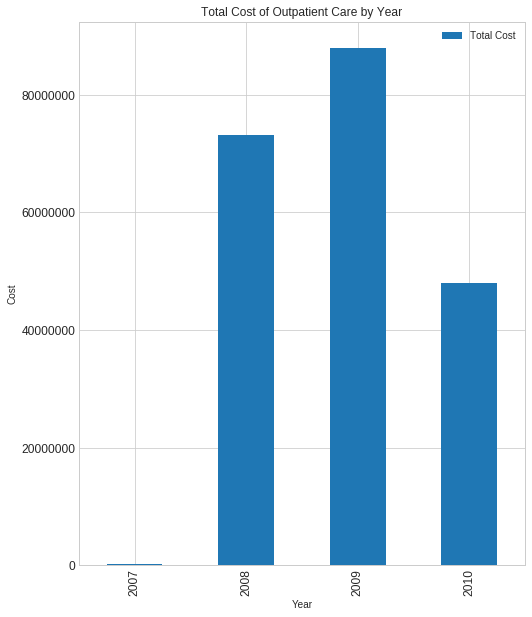

In [23]:
yr_claims.plot.bar(title='Total Cost of Outpatient Care by Year', figsize=(8,10), legend=True, fontsize=12)
plt.style.use('seaborn-whitegrid')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

## Figure 2


### Filtering the dataframe

First we filter the dataframe to year 2009 only, and then we drop the observations from the dataframe where there is no provider NPI present.

In [10]:
df_2009 = df[(df['CLM_FROM_DT'] >= '2009-01-01') & (df['CLM_FROM_DT'] <= '2009-12-31')]

In [11]:
df_2009 = df_2009.dropna(axis=0, subset=[['AT_PHYSN_NPI', 'OP_PHYSN_NPI', 'OT_PHYSN_NPI']], how='all')

### Finding the number of unique physicians visited

First we will narrow down the dataframe by only pulling the patient's ID, the attending physician's NPI, operating physician's NPI, and other physician's NPI.
Next we define a new function that concatenates the physician columns and returns the unique count of physicians.
Finally the data is grouped by the patient's ID, and the function is called.

In [12]:
npi = df_2009.loc[:, ['DESYNPUF_ID', 'AT_PHYSN_NPI', 'OP_PHYSN_NPI', 'OT_PHYSN_NPI']]

In [13]:
def doc_count(concat):
    physician_cols = [concat['AT_PHYSN_NPI'], concat['OP_PHYSN_NPI'], concat['OT_PHYSN_NPI']]
    return len(pd.concat(physician_cols).dropna(inplace=False).unique())

In [14]:
num_phys = npi.groupby("DESYNPUF_ID").apply(doc_count)

### Totaling the claims payment amount

Next we will create a new dataframe that contains the patient's ID and amount of claims payment amount. Then we will group the data by the patient's ID and use the sum function.

In [15]:
costs = df_2009.loc[:, ['DESYNPUF_ID', 'CLM_PMT_AMT']]
costs_grouped = costs.groupby('DESYNPUF_ID')
total_costs = costs_grouped.sum()

### Combining it all

To combine the extracted data, we concatenate by patient ID.

In [16]:
costs_num_phys = pd.concat([total_costs, num_phys], axis=1)

# We name the columns appropriately
costs_num_phys.columns = ['Tot_Costs_Care', 'Num_Uniq_Phys']

# We rename the index accordingly
costs_num_phys.index.name = 'PatientID'

### Averaging the total costs of care per number of physicians

First we will group the dataframe by the number of physicians, then average the cost of care with the number of physician seen.

In [17]:
df3 = costs_num_phys.groupby(['Num_Uniq_Phys'], as_index=False).mean()
df3

,Num_Uniq_Phys,Tot_Costs_Care
0,1,259.260551
1,2,442.219176
2,3,679.061885
3,4,881.532186
4,5,1089.559609
5,6,1334.018542
6,7,1589.645485
7,8,1781.857384
8,9,2092.768017
9,10,2478.374770


### Plotting with Matplotlib

We use the Matplotlib plotting module to graph our data. A line graph is used to demonstrate the relationship of the number of physicians with the total cost of outpatient care. As expected, the total cost of care increases as the number of physicians seen increases.

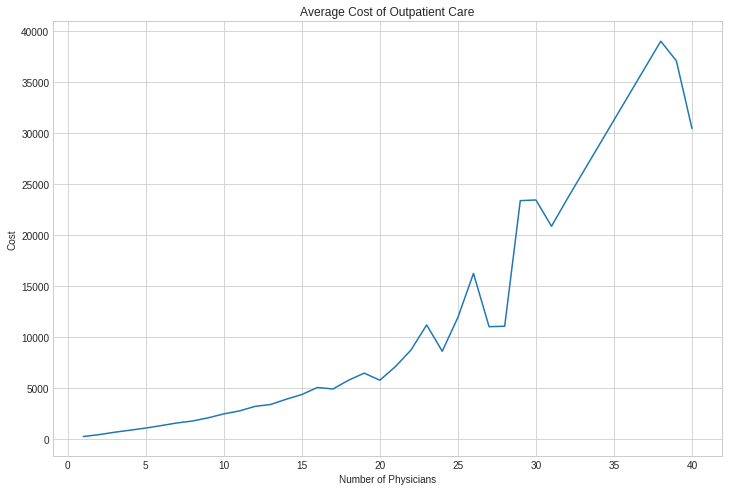

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df3["Num_Uniq_Phys"],df3["Tot_Costs_Care"])
plt.title('Average Cost of Outpatient Care')
plt.xlabel('Number of Physicians')
plt.ylabel('Cost')
plt.show()